# UC Berkeley Capstone by Kelly Lieu
Cohort: October 2024<br/>
Date of Assignment: May 2025

## Background <br/>
My goal is for this capstone is for me to learn and practice how to apply AI/ML principles with
storytelling data visualization techniques. It was important to me to choose a dataset that was easy to obtain and a topic that I can learn from to apply at home or at work.The data comes from Kaggle called, "Longevity Factors." We will explore:

*  Which features provide most gain in years of life?
*  How many years I gained or loss based on the features that I select?
*  What are the true top features based on the combination of weight I assigned to strength of science and years?
* How do the strong science features rank against the suggestive features?
* What other insights can I derive from the data?

## Table of Contents
1.   Exploratory Data Analysis (EAD)
2.   Feature Engineering



## Exploratory Data Analysis (EAD)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# mount GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KellyLieu_AI-ML_Project/Longevity/data/LiveLongerData.csv')

In [5]:
df.head()

,Factor,Years gained / lost,strength of science?,strength of science as a number,sexes affected,effect,Comment,Note,ID,Sources,Links
0,Smoking,-10.0,strong,3,Both,negative,10 years gained (against those who continue to...,14 if combined with exercise and eating health...,1,"Khaw KT, et al. (2008). Combined impact of hea...",http://www.washingtonpost.com/wp-dyn/articles/...
1,Sitting Down,-3.0,suggestive,1,Both,negative,for 8-11 hours sitting a day,"No matter how much you exercise, sitting too m...",2,Sydney School of Public Health research paper ...,http://www.ncbi.nlm.nih.gov/pubmed/22450936
2,Too much sleeping,-1.5,suggestive,1,Both,negative,"7 hours ideal, no more than 8 hrs a night",Averaging more than 8 hours sleep a night will...,3,New Scientist,http://www.newscientist.com/article/dn1928-sev...
3,More Optimism,2.0,suggestive,1,Female,positive,& faith in fellow humans. calc takes average %...,Women within the highest 25% of optimism score...,4,"Source: Hilary A. Tindle, M.D., assistant prof...",www.nlm.nih.gov/medlineplus/news/fullstory_879...
4,More Pets,3.0,good,2,Both,positive,particularly for elderly. calc assumes that he...,(1) Cats - According to a study by the Minneso...,5,Medical News Today; National Center for Biotec...,http://www.medicalnewstoday.com/articles/98432...


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Factor                           35 non-null     object 
 1   Years gained / lost              35 non-null     float64
 2   strength of science?             35 non-null     object 
 3   strength of science as a number  35 non-null     int64  
 4   sexes affected                   35 non-null     object 
 5   effect                           35 non-null     object 
 6   Comment                          26 non-null     object 
 7   Note                             35 non-null     object 
 8   ID                               35 non-null     int64  
 9   Sources                          35 non-null     object 
 10  Links                            35 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.1+ KB


In [31]:
df.describe()

,Years gained / lost,strength of science as a number,ID
count,35.000000,35.000000,35.000000
mean,3.243143,1.771429,18.000000
std,8.126155,0.877353,10.246951
min,-25.000000,1.000000,1.000000
25%,1.070000,1.000000,9.500000
50%,3.500000,1.000000,18.000000
75%,7.750000,3.000000,26.500000
max,15.000000,3.000000,35.000000



Missing Values:
Factor                             0
Years gained / lost                0
strength of science?               0
strength of science as a number    0
sexes affected                     0
effect                             0
Comment                            9
Note                               0
ID                                 0
Sources                            0
Links                              0
dtype: int64


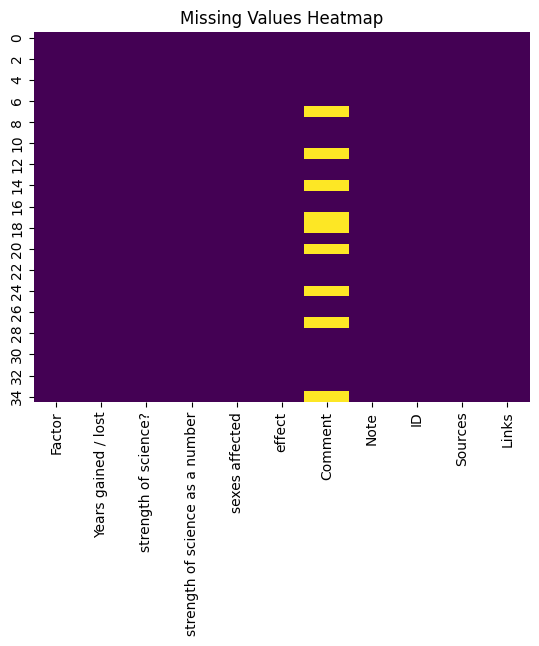

In [32]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [60]:
# Drop irrelevant and columns with missing values
df_cleaned = df.drop(columns=['Comment', 'Note', 'Sources', 'Links', 'ID'], axis=1)

In [61]:
# Select numerical columns
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
# Calculate correlation matrix using pearson method
corr_matrix = df_cleaned[numerical_features].corr(method='pearson')

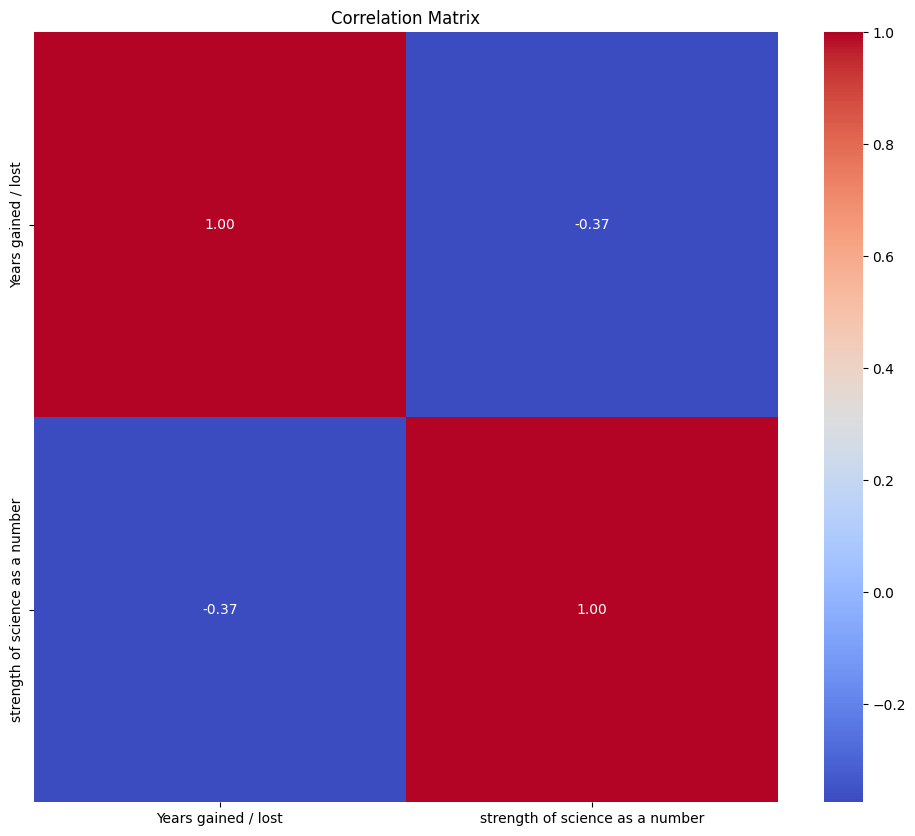

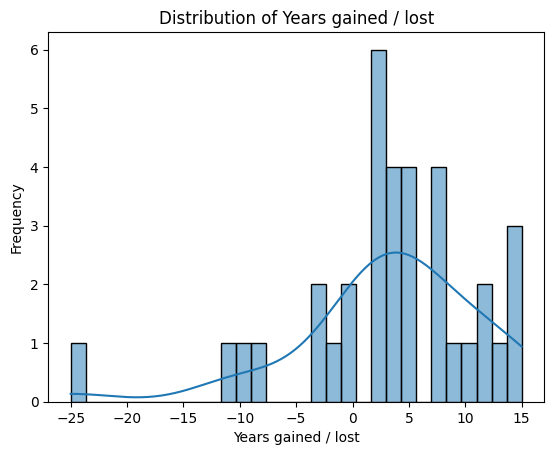

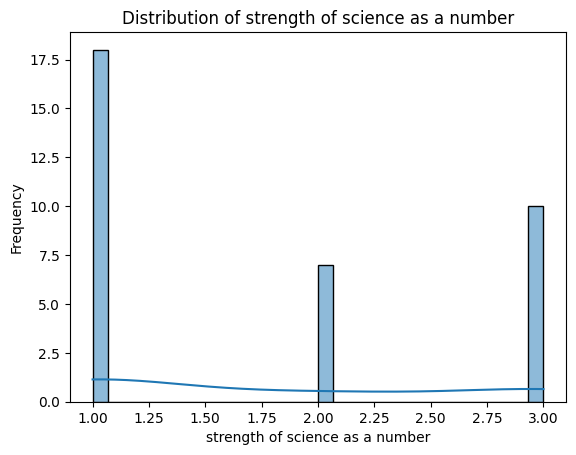

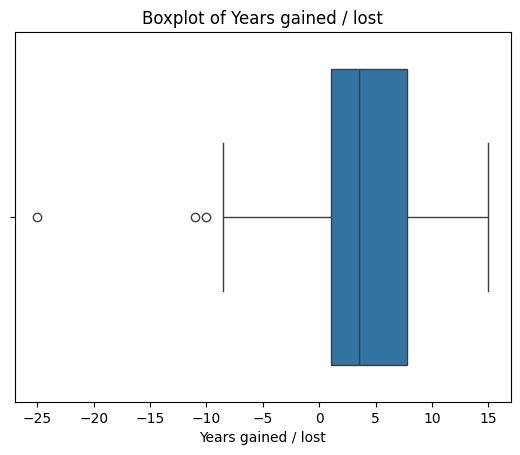

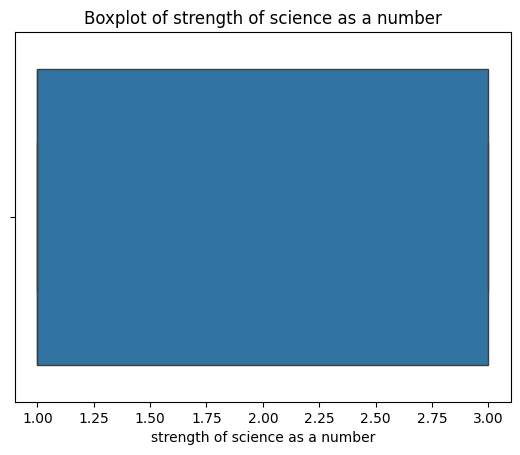

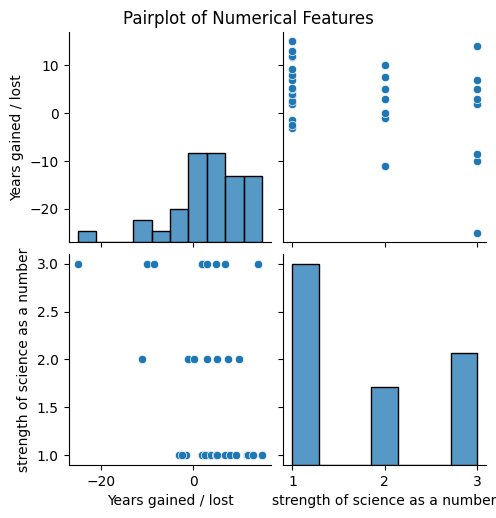

In [62]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution plots for numerical features
numerical_features = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

for feature in numerical_features:
    plt.figure()
    sns.histplot(df_cleaned[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots to identify outliers
for feature in numerical_features:
    plt.figure()
    sns.boxplot(x=df_cleaned[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df[numerical_features])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

## Feature Engineering

In [63]:
# Create a copy of cleaned df
df_fe = df_cleaned.copy()

In [64]:
# Handle categorical variables
# Check for object or category type columns
categorical_cols = df_fe.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['Factor', 'strength of science?', 'sexes affected', 'effect']


In [65]:
# One-hot encode categorical features
df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

In [66]:
# Create interaction terms (multiplying influential features)
# For interaction between Factor and strength of science
if 'Factor' in df_fe.columns and 'strength of science?' in df_fe.columns:
    df_fe['Factor_science_Interaction'] = df_fe['Factor'] * df_fe['strength of science as a number']

In [67]:
# Create polynomial features for numeric variables
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
numerical_cols = df_fe.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [68]:
# Avoid generating polynomial features for the target column
target_column = 'Years gained / lost '
if target_column in numerical_cols:
    numerical_cols.remove(target_column)

In [69]:
poly_features = poly.fit_transform(df_fe[numerical_cols])
poly_feature_names = poly.get_feature_names_out(numerical_cols)

# Create DataFrame for polynomial features
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate with original dataframe (excluding the original numerical cols used for poly features)
df_fe = df_fe.drop(columns=numerical_cols).reset_index(drop=True)
df_fe = pd.concat([df_fe.reset_index(drop=True), df_poly.reset_index(drop=True)], axis=1)

In [70]:
df_fe.head()

,Factor_A little exercise,Factor_A little wine,Factor_Alcohol (heavy abuse),Factor_Avoid Cancer,Factor_Avoid heart disease,Factor_City living,Factor_Country living,Factor_Good genetics,Factor_Good marriage,Factor_Greater Faith (churchgoing),...,"sexes affected_Both, but esp. for men",sexes affected_Female,sexes affected_Male,sexes affected_male,effect_positive,Years gained / lost,strength of science as a number,Years gained / lost^2,Years gained / lost strength of science as a number,strength of science as a number^2
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,-10.0,3.0,100.00,-30.0,9.0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,-3.0,1.0,9.00,-3.0,1.0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,-1.5,1.0,2.25,-1.5,1.0
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,2.0,1.0,4.00,2.0,1.0
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,3.0,2.0,9.00,6.0,4.0


In [71]:
# Normalize/scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_fe)
df_scaled = pd.DataFrame(scaled_features, columns=df_fe.columns)